# 문제 1. KNN 실습

* 아래의 코드를 사용해 이번 문제에서 사용할 데이터 셋을 불러와주세요.

In [ ]:
import seaborn as sns

df = sns.load_dataset('titanic')

 ### 1-1
 * 각 column의 결측치 개수를 확인하고, survived, pclass, sex, age, sibsp,parch 열만을 남기고 남은열들을 모두 삭제해주세요.

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df = df.loc[:,['survived', 'pclass', 'sex', 'age', 'sibsp','parch']]
df

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


### 1-2
* age열의 데이터가 존재하지 않는 행을 모두 삭제해주세요.  
* one_hot_encoding을 사용해 sex열의 데이터를 숫자형으로 변환하고, 변환이 끝나면 기존의 sex열을 삭제해주세요.

In [ ]:
df = df.dropna(axis=0)
df

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


In [ ]:
import numpy as np   
import pandas as pd  
df = pd.get_dummies(df, columns=['sex'])
df

,survived,pclass,age,sibsp,parch,sex_female,sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,1,0
886,0,2,27.0,0,0,0,1
887,1,1,19.0,0,0,1,0
889,1,1,26.0,0,0,0,1


In [ ]:
df.rename(columns = {'sex_female' : 'female'}, inplace = True)
df.rename(columns = {'sex_male' : 'male'}, inplace = True)
df

,survived,pclass,age,sibsp,parch,female,male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,1,0
886,0,2,27.0,0,0,0,1
887,1,1,19.0,0,0,1,0
889,1,1,26.0,0,0,0,1


### 1-3
* X = df[['pclass', 'age', 'sibsp', 'parch', 'female', 'male']]
* Y = df['survived']
* 위의 코드를 실행하고, X를 StandardScaler를 사용해 정규화해주세요.

In [ ]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'female', 'male']]
Y = df['survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

### 1-4
* 테스트 데이터의 비율은 30%로 하고, 학습 데이터는 train, 테스트 데이터는 test로 저장해주세요. 이 때 데이터 분할 시 랜덤 난수 임의값을 10으로 지정해주세요.
* k를 찾는 과정을 실행해주세요.

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,
                                                   test_size=0.3, random_state=10)

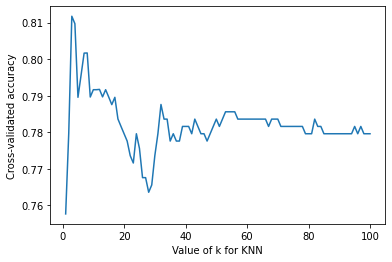

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 1부터 100까지의 K 중 10겹교차검증을 통해 KNN 알고리즘의 성능을 가장 좋게하는 K를 찾는 과정입니다.
k_range= np.arange(1,101)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(k)
    scores = cross_val_score(model,X_train,Y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()
#코드를 완성하시오.

In [ ]:
result = pd.DataFrame() 
result['k'] = k_range 
result['accuracy'] = k_scores
result = result.sort_values(by='accuracy', ascending=False).reset_index(drop=True)
result.head()

,k,accuracy
0,3,0.811714
1,4,0.809673
2,8,0.801673
3,7,0.801633
4,6,0.795551


### 1-5 
* 2.4에서 얻은 k를 하이퍼파라미터로 하는 KNN 알고리즘을 사용해 Survived의 값을 예측하고, accuracy_score를 사용해 모델의 평가해주세요.

In [ ]:
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier(result['k'][0])
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred))

[[109  16]
 [ 25  65]]
0.8093023255813954


# 문제 2. SVM 실습

사용할 breast cancer 데이터는 유방암 진단을 위한 데이터셋으로 30개의 속성과 malignant(악성), benign(양성)의 두가지 타겟값을 가지고 있습니다. 
 
30개의 독립변수를 통해 유방암을 예측하는 SVM 모델을 만들 예정입니다. 

### 2-1. 유방암 데이터 불러오기

In [ ]:
import pandas as pd
from sklearn import datasets

datasets=datasets.load_breast_cancer()

df=pd.DataFrame(data=datasets.data, columns=datasets.feature_names)

df['target'] = datasets.target


print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2-2. 데이터 탐색
데이터에 대해 다음 특성을 탐색해보세요.
- 데이터 형태 확인 (shape)
- 'target' 변수의 범주(0 or 1)별 개수 확인 (value_counts)
- 열별 결측값 확인 (isna)

In [ ]:
df.shape

(569, 31)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


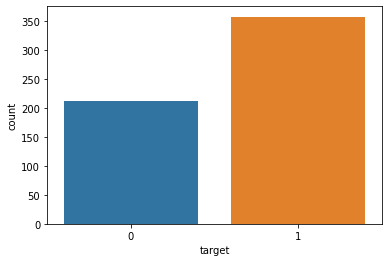

In [ ]:
import seaborn as sns
sns.countplot(df['target']) 

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### 2-3.  선형분리/비선형분리 선택하기
선형분리 중 linear와 비선형분리 중 rbf를 선택했습니다.

아래 코드를 실행한 후, 둘 중 무엇이 좋을지, 그 이유는 무엇일지 적어주세요.
* hint: cross validation, kernel, linear, rbf

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, cross_validate

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# 선형분리 진행
svm_clf_l =svm.SVC(kernel = 'linear')

# 교차검증
scores_l = cross_val_score(svm_clf_l, X, y, cv = 5)
scores_l

print('교차검증 평균: ', scores_l.mean())

교차검증 평균:  0.9455364073901569


In [ ]:
# 비선형분리 진행
svm_clf_r =svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf_r, X, y, cv = 5)
scores

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9121720229777983


무엇이 좋을까요?: rbf

이유: 선형 svm으로 분류할수 없는 데이터들이 있을 수 도 있고 score점수는 파라미터를 통해 달라질수도 있다고 생각하기 때문입니다.

### 2-4. 데이터 나누기
데이터를 학습 데이터와 테스트 데이터로 나누세요.

- 테스트 데이터의 비율은 20%로 하고, 학습 데이터는 train, 테스트 데이터는 test로 저장해주세요! 

- 데이터 분할 시 랜덤 난수 임의값을 100으로 지정해주세요.

* hint: sklearn, train_test_split, random_state

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis=1),df['target'], test_size=0.2, random_state=100)

### 2-5 하이퍼파라미터 구하고 SVM 적용하기
3-3에서 정한 방법에 필요한 파라미터값을 구해준 후, 구한 파라미터로 학습된 모델을 clf에 저장하는 과정입니다.

1.선형분리를 택했다면 c 튜닝

2.비선형분리를 택했다면 c와 gamma 튜닝 

1번과 2번 중 하나를 선택하고, 해당하는 과정에서 빠진 부분을 채운 후 실행해주세요. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

#빠진 부분을 채우고 실행하세요. 
#hint: train data를 X_train, y_train으로 나누는 것을 잊지 말아주세요.

In [ ]:
#1번 선형을 선택한 경우 빠진 부분을 채우고 실행하세요.


def svc_param_selection(X,y,nfolds):
    svm_parameters = [
                        {'kernel': [''],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                       ]
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    
    return clf

In [ ]:
#2번 비선형을 선택한 경우 빠진 부분을 채우고 실행하세요.


def svc_param_selection(X,y,nfolds):
    svm_parameters = [
                        {'kernel': ['rbf'],
                         'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                        }
                       ]
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    
    return clf

In [ ]:
clf = svc_param_selection(X_train, y_train, 10) 

{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}


In [ ]:
#clf로 저장한 모델의 train 정확도를 확인하는 코드입니다. 실행하세요. 
result = pd.DataFrame(clf.cv_results_['params'])
result['mean_test_score'] = clf.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,kernel,mean_test_score
24,100.00,0.00001,rbf,0.951546
30,1000.00,0.00001,rbf,0.945217
18,10.00,0.00001,rbf,0.942850
13,1.00,0.00010,rbf,0.938551
19,10.00,0.00010,rbf,0.938406
7,0.10,0.00010,rbf,0.925217
25,100.00,0.00010,rbf,0.923140
12,1.00,0.00001,rbf,0.920821
14,1.00,0.00100,rbf,0.918744
6,0.10,0.00001,rbf,0.914251


### 2-6. 테스트 
최적의 파라미터로 학습된 clf를 이용하여,
테스트를 진행해봅시다.

테스트 결과 정확도는 어떻게 나왔나요?

In [ ]:
#test data를 X_test, y_test으로 나누는 것을 잊지 말아주세요

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("accuracy : "+str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.98      0.97      0.98        65

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy : 0.9736842105263158


## 3. SVM 성능 개선하기
발표에서도 언급했듯이 SVM 모델은 "______"에 민감하기 때문에
전처리에서 이 과정을 꼭 거쳐야 합니다.
위에서 빼먹은 이 과정은 무엇일까요?

답: 표준화입니다.